In [1]:
!pip install hdbscan
!pip install scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hdbscan


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving synthetic_traffic_data.csv to synthetic_traffic_data.csv


,Timestamp,Latitude,Longitude,Speed,Road Type,Vehicle Type,Vehicle Count,Congestion Score
0,2025-01-01 00:00:00,12.974908,77.537027,16,Service Road,Truck,139,24.529412
1,2025-01-01 01:00:00,13.090143,77.608380,44,Highway,Bike,72,1.600000
2,2025-01-01 02:00:00,13.046399,77.674589,64,Main Road,Truck,151,4.646154
3,2025-01-01 03:00:00,13.019732,77.646445,23,Service Road,Bike,163,20.375000
4,2025-01-01 04:00:00,12.931204,77.661312,19,Main Road,Truck,132,13.200000


In [4]:
# Fix column names (remove spaces)
df = df.rename(columns={
    'Road Type':'RoadType',
    'Vehicle Type':'VehicleType',
    'Vehicle Count':'VehicleCount',
    'Congestion Score':'CongestionScore'
})

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create Hour and Day columns
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day_name()

# Select features for clustering
features = df[['Latitude','Longitude','Speed','VehicleCount','Hour']]
features.head()


,Latitude,Longitude,Speed,VehicleCount,Hour
0,12.974908,77.537027,16,139,0
1,13.090143,77.608380,44,72,1
2,13.046399,77.674589,64,151,2
3,13.019732,77.646445,23,163,3
4,12.931204,77.661312,19,132,4


In [5]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=25)
labels = clusterer.fit_predict(features)

df['Cluster'] = labels
df['Cluster'].value_counts()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,count
Cluster,
-1,797
1,94
2,78
0,31


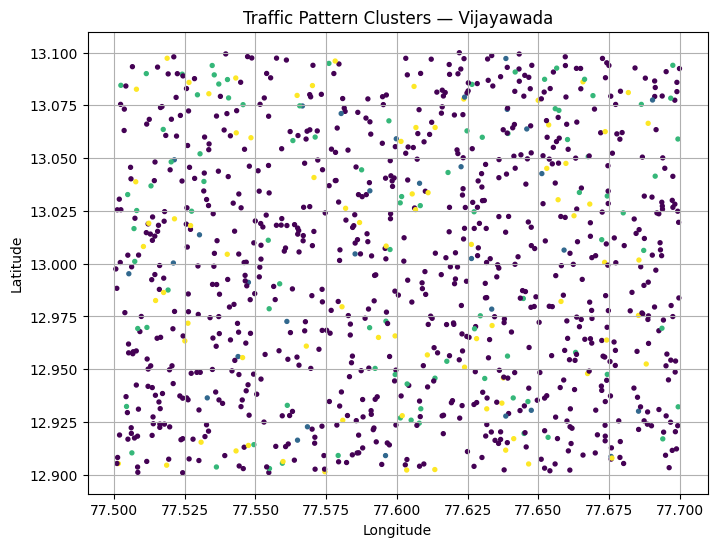

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], s=8, cmap='viridis')
plt.title("Traffic Pattern Clusters — Vijayawada")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [8]:
print("Total clusters found:", len(set(labels)) - (1 if -1 in labels else 0))
print("Noise points:", (labels == -1).sum())

peak_hours = df.groupby('Hour')['VehicleCount'].mean().sort_values(ascending=False).head(3)
print("\n⏱ Peak Congestion Hours:")
print(peak_hours)

road_congestion = df.groupby('RoadType')['CongestionScore'].mean().sort_values(ascending=False)
print("\n🛣 Road Type vs Congestion:")
print(road_congestion)

vehicle_congestion = df.groupby('VehicleType')['CongestionScore'].mean().sort_values(ascending=False)
print("\n🚗 Vehicle Type vs Congestion:")
print(vehicle_congestion)


Total clusters found: 3
Noise points: 797

⏱ Peak Congestion Hours:
Hour
15    131.095238
2     118.880952
17    116.073171
Name: VehicleCount, dtype: float64

🛣 Road Type vs Congestion:
RoadType
Service Road    7.480848
Main Road       6.084845
Highway         2.329896
Name: CongestionScore, dtype: float64

🚗 Vehicle Type vs Congestion:
VehicleType
Truck    5.294263
Bike     5.213966
Car      5.183641
Name: CongestionScore, dtype: float64
